In [5]:
import pandas as pd
import numpy as np
import wquantiles as wq
from scipy import stats
from statsmodels import robust

In [6]:
# Note: I downloaded dataset
dataset = pd.read_csv(r'C:\Users\Abbas\Desktop\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv');

In [7]:
dataset

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [10]:
dataset["order_amount"].mean()

3145.128

In [11]:
dataset["order_amount"].median()

284.0

In [12]:
dataset["order_amount"].mode()

0    153
dtype: int64

In [13]:
stats.trim_mean(dataset["order_amount"], 0.1)

287.39075

In [14]:
dataset["order_amount"].sort_values()

158         90
3871        90
4760        90
4923        90
4932        90
         ...  
2153    704000
1562    704000
1362    704000
520     704000
3332    704000
Name: order_amount, Length: 5000, dtype: int64

In [15]:
dataset["order_amount"].value_counts().head(100)

153    87
306    85
354    82
312    75
156    75
       ..
144    19
519    19
162    18
202    18
384    18
Name: order_amount, Length: 100, dtype: int64

<AxesSubplot:>

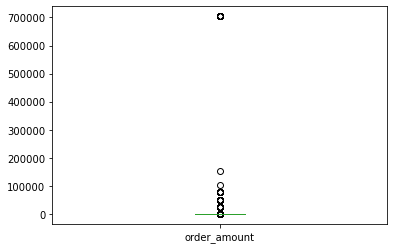

In [16]:
dataset["order_amount"].plot.box()

Text(0.5, 0, 'Money Paid By Each Order')

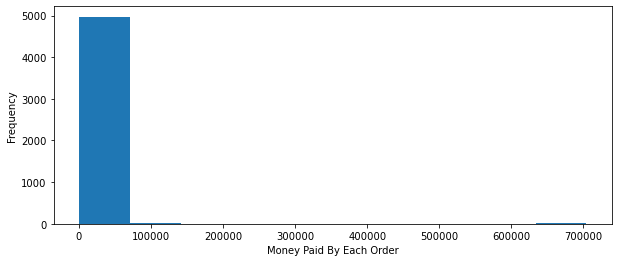

In [17]:
ax = (dataset["order_amount"]).plot.hist(figsize=(10, 4), bins = 10)
ax.set_xlabel("Money Paid By Each Order")

# Results

**1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data?**
    Average does not always mean, because mean is not a robust metric. Thats is, mean is sensitive to outliers. So, in this case, median represents a better metric for average.
    
**2. What metric would you report for this dataset?**
    Mean is a better measurement to report as the AOV.
    
**3. What is its value?**
    Mediam: 284.0